<a href="https://colab.research.google.com/github/WaithiraHawi/Derivative_Pricing/blob/main/Merton_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
lamb = 0.75  # Lambda of the model
mu = -0.6  # Mu
delta = 0.25  # Delta

In [3]:
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1.0  # Maturity/time period (in years)
S0 = 100  # Current Stock Price

Ite = 10000  # Number of simulations (paths)
M = 50  # Number of steps
dt = T / M  # Time-step

In [4]:
SM = np.zeros((M + 1, Ite))
SM[0] = S0

# rj
rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

# Random numbers
z1 = np.random.standard_normal((M + 1, Ite))
z2 = np.random.standard_normal((M + 1, Ite))
y = np.random.poisson(lamb * dt, (M + 1, Ite))

In [5]:
for t in range(1, M + 1):
    SM[t] = SM[t - 1] * (
        np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
        + (np.exp(mu + delta * z2[t]) - 1) * y[t]
    )
    SM[t] = np.maximum(
        SM[t], 0.00001
    )  # To ensure that the price never goes below zero!

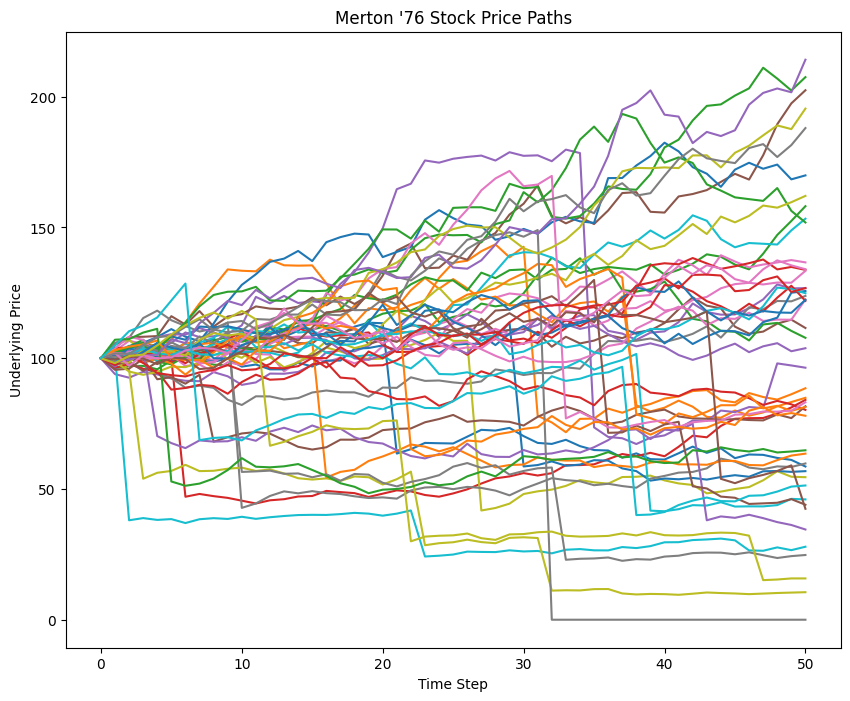

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(SM[:, 100:150])
plt.title("Merton '76 Stock Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Underlying Price")
plt.show()

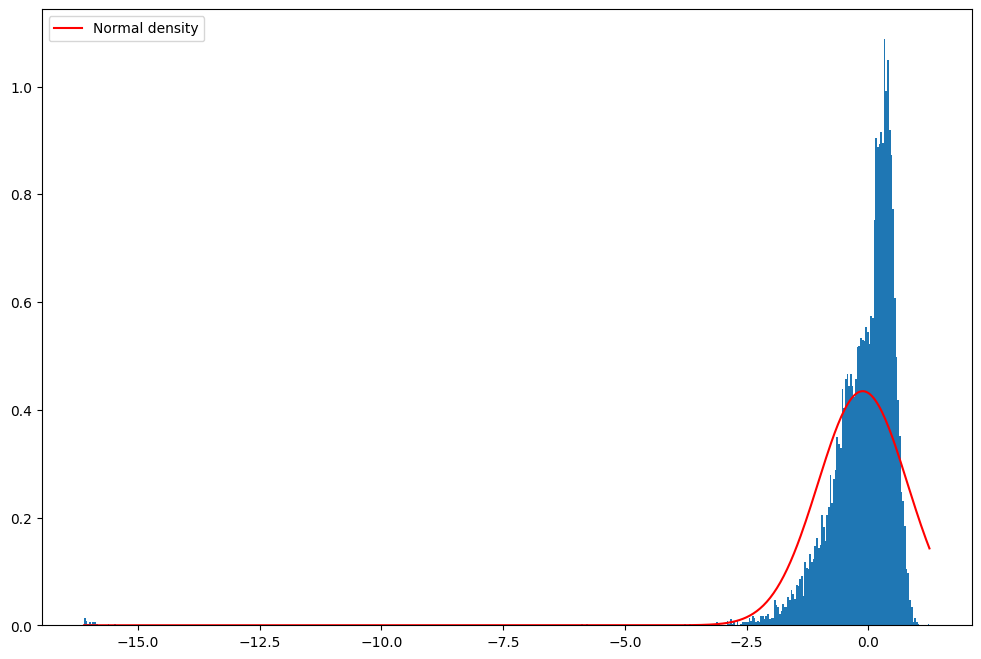

In [7]:
retSM = np.log(SM[-1, :] / S0)
x = np.linspace(retSM.min(), retSM.max(), 500)

plt.figure(figsize=(12, 8))
plt.hist(retSM, density=True, bins=500)
plt.plot(
    x, ss.norm.pdf(x, retSM.mean(), retSM.std()), color="r", label="Normal density"
)
plt.legend()
plt.show()

**Heston and GBM**

In [8]:
S = np.zeros((M + 1, Ite))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp(
        (r - 0.5 * sigma**2) * dt
        + sigma * np.sqrt(dt) * np.random.standard_normal(Ite)
    )

In [ ]:
retS = np.log(S[-1, :] / S0)
y = np.linspace(retS.min(), retS.max(), 500)

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(retS, density=True, bins=500)
plt.plot(y, ss.norm.pdf(y, retS.mean(), retS.std()), color="r", label="Normal density")
plt.legend()
plt.show()

**Heston Returns and distribution**

In [9]:
def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, Ite), dtype=np.float)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1]
            + kappa * (theta - v[t - 1]) * dt
            + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v


def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M + 1, Ite), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1, 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)

    return S


def random_number_gen(M, Ite):
    rand = np.random.standard_normal((2, M + 1, Ite))
    return rand

In [10]:
# Heston given parameters
v0 = 0.04
kappa_v = 2
sigma_v = 0.2
theta_v = 0.04
rho = -0.9


# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [11]:
retHS = np.log(HS[-1, :] / S0)
q = np.linspace(retHS.min(), retHS.max(), 500)


plt.figure(figsize=(12, 8))
plt.hist(retHS, density=True, bins=500)
plt.plot(
    q, ss.norm.pdf(y, retHS.mean(), retHS.std()), color="r", label="Normal density"
)
plt.legend()
plt.show()

NameError: name 'HS' is not defined

NameError: name 'HS' is not defined

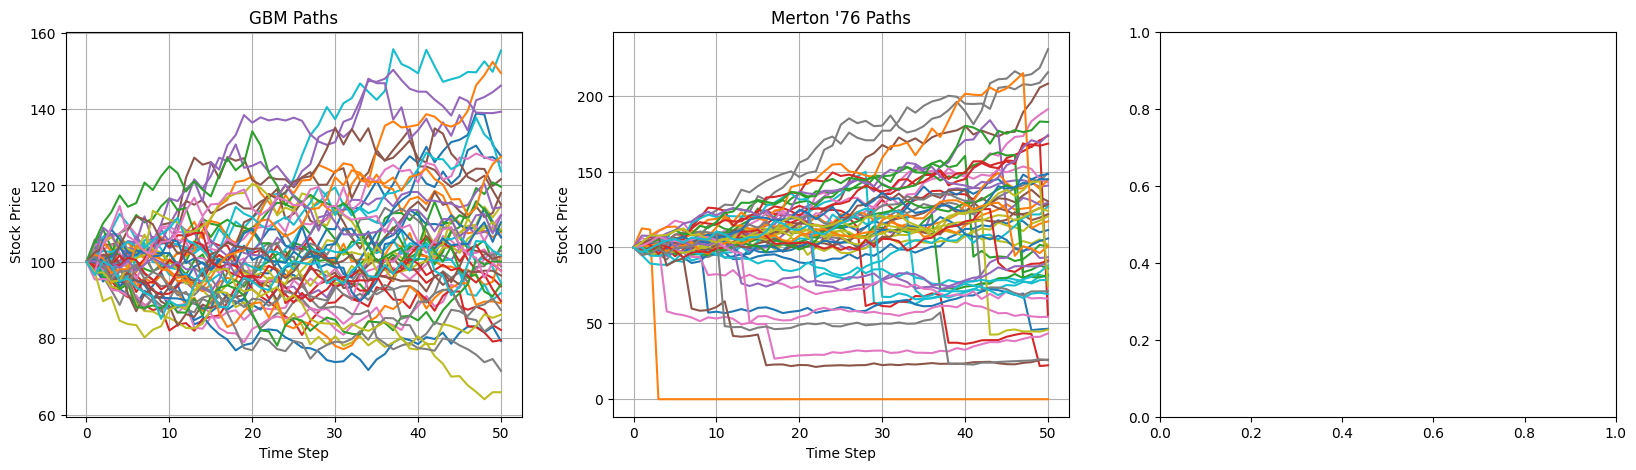

In [12]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(S[:, :50])
ax1.grid()
ax1.set_title("GBM Paths")
ax1.set_ylabel("Stock Price")
ax1.set_xlabel("Time Step")

ax2.plot(SM[:, :50])
ax2.grid()
ax2.set_title("Merton '76 Paths")
ax2.set_ylabel("Stock Price")
ax2.set_xlabel("Time Step")

ax3.plot(HS[:, :50])
ax3.grid()
ax3.set_title("Heston Paths")
ax3.set_ylabel("Stock Price")
ax3.set_xlabel("Time Step")

**Pricing under Black-Scholes: GBM**

In [13]:
def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

In [14]:
print("European Call Price under BS (MC): ", bs_call_mc(S0, 90, r, sigma, T, 0, Ite))

European Call Price under BS (MC):  16.590743651834817


**Pricing under Heston**

In [15]:
def heston_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

In [ ]:
print("European Call Price under Heston: ", heston_call_mc(HS, 90, r, T, 0))

**Pricing under Merton**

In [16]:
def merton_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

In [ ]:
print("European Call Price under Merton: ", merton_call_mc(SM, 90, r, T, 0))

**Merton Model Parameters**

In [17]:
lamb = 0.75  # Lambda of the model
mu = 0.6  # Mu
delta = 0.25  # Delta

r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1.0  # Maturity/time period (in years)
S0 = 100  # Current Stock Price

Ite = 10000  # Number of simulations (paths)
M = 50  # Number of steps
dt = T / M  # Time-step

SM = np.zeros((M + 1, Ite))
SM[0] = S0

# rj
rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

# Random numbers
z1 = np.random.standard_normal((M + 1, Ite))
z2 = np.random.standard_normal((M + 1, Ite))
y = np.random.poisson(lamb * dt, (M + 1, Ite))

In [18]:
lamb = 0.99  # Lambda of the model
mu = -0.6  # Mu
delta = 0.25  # Delta

r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1.0  # Maturity/time period (in years)
S0 = 100  # Current Stock Price

Ite = 10000  # Number of simulations (paths)
M = 50  # Number of steps
dt = T / M  # Time-step

SM = np.zeros((M + 1, Ite))
SM[0] = S0

# rj
rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

# Random numbers
z1 = np.random.standard_normal((M + 1, Ite))
z2 = np.random.standard_normal((M + 1, Ite))
y = np.random.poisson(lamb * dt, (M + 1, Ite))

In [19]:
for t in range(1, M + 1):
    SM[t] = SM[t - 1] * (
        np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
        + (np.exp(mu + delta * z2[t]) - 1) * y[t]
    )
    SM[t] = np.maximum(
        SM[t], 0.00001
    )  # To ensure that the price never goes below zero!

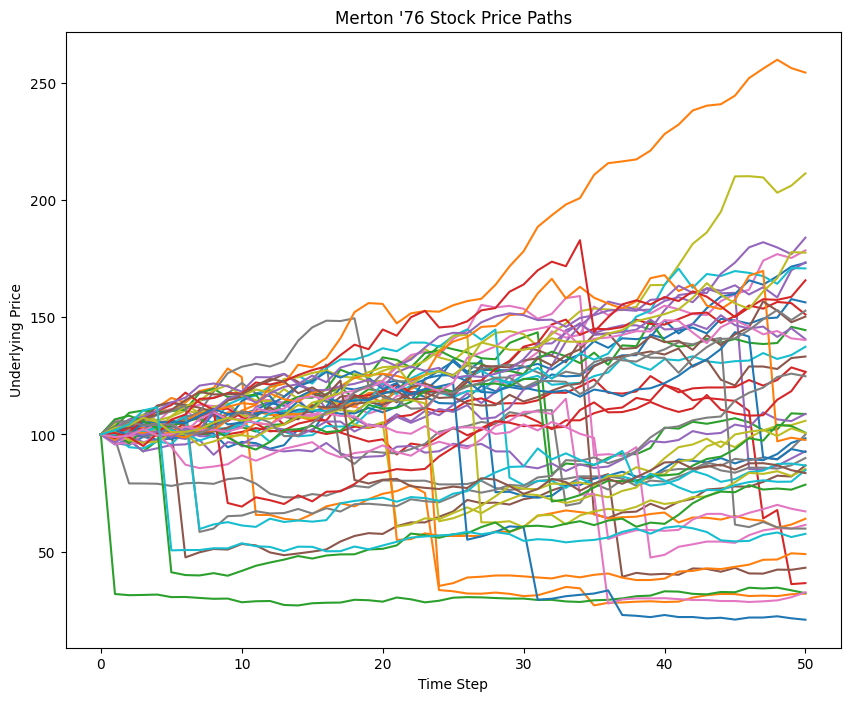

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(SM[:, 100:150])
plt.title("Merton '76 Stock Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Underlying Price")
plt.show()

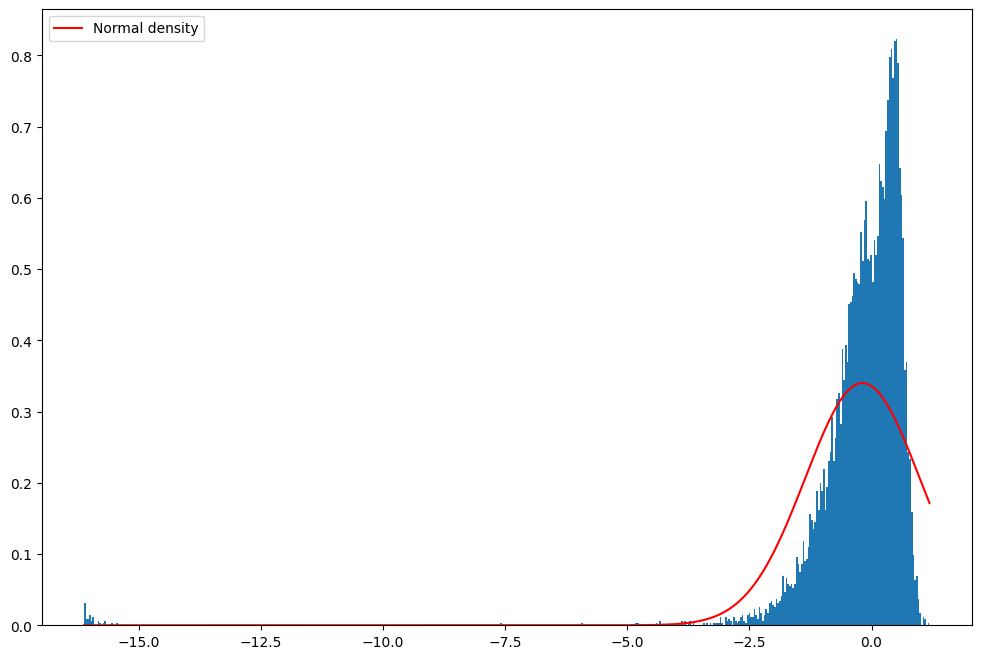

In [21]:
retSM = np.log(SM[-1, :] / S0)
x = np.linspace(retSM.min(), retSM.max(), 500)

plt.figure(figsize=(12, 8))
plt.hist(retSM, density=True, bins=500)
plt.plot(
    x, ss.norm.pdf(x, retSM.mean(), retSM.std()), color="r", label="Normal density"
)
plt.legend()
plt.show()

**Changing  𝜇𝑗**

In [22]:
for t in range(1, M + 1):
    SM[t] = SM[t - 1] * (
        np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
        + (np.exp(mu + delta * z2[t]) - 1) * y[t]
    )
    SM[t] = np.maximum(
        SM[t], 0.00001
    )  # To ensure that the price never goes below zero!

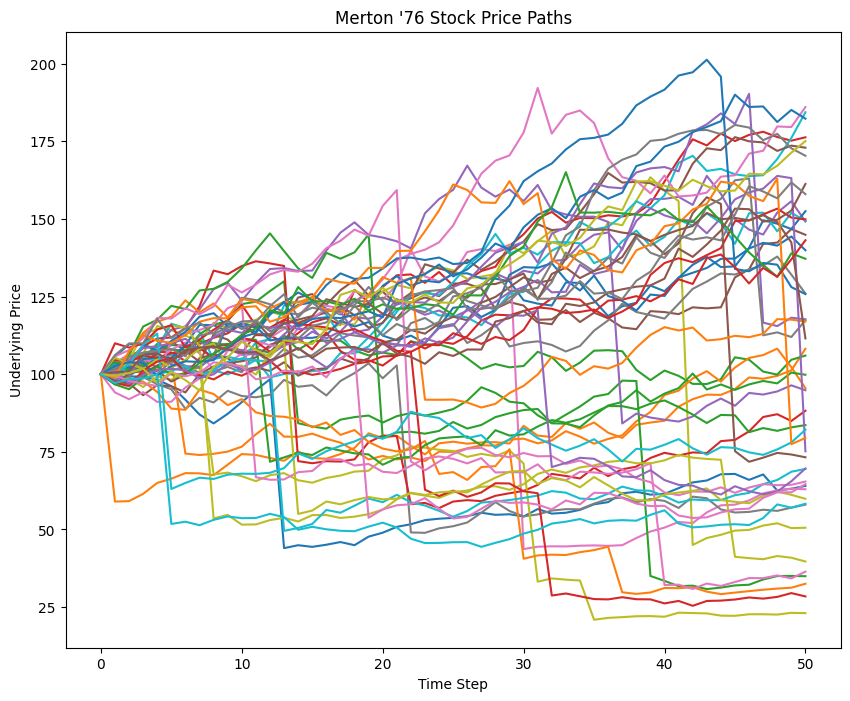

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(SM[:, 0:50])
plt.title("Merton '76 Stock Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Underlying Price")
plt.show()

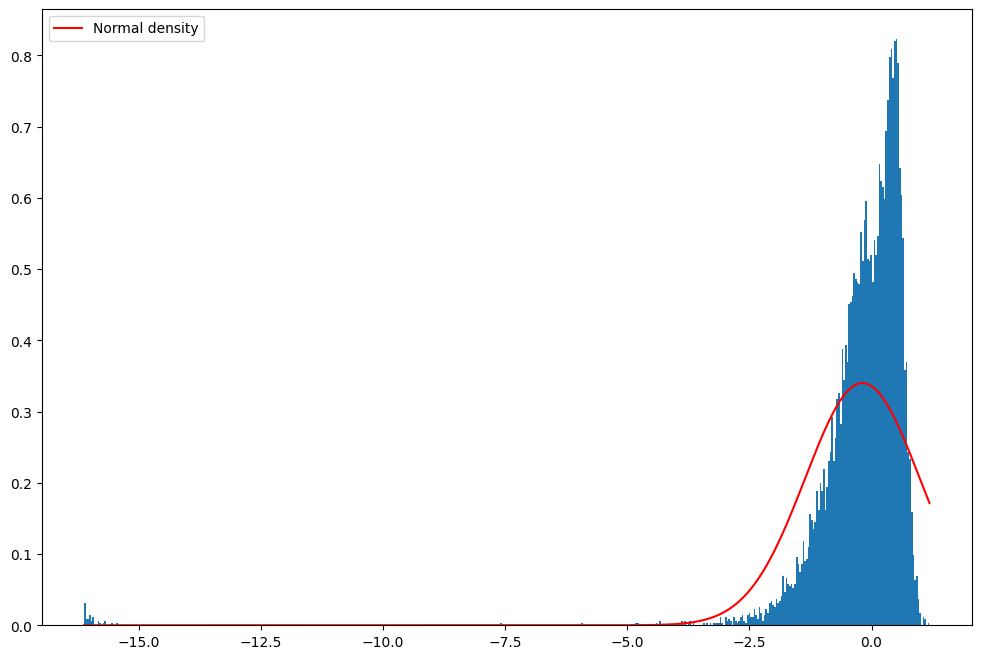

In [24]:
retSM = np.log(SM[-1, :] / S0)
x = np.linspace(retSM.min(), retSM.max(), 500)

plt.figure(figsize=(12, 8))
plt.hist(retSM, density=True, bins=500)
plt.plot(
    x, ss.norm.pdf(x, retSM.mean(), retSM.std()), color="r", label="Normal density"
)
plt.legend()
plt.show()